In [4]:
#C2054492

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("Coursework_1_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Coursework_1_data.csv'

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
labelencoder = LabelEncoder()

In [6]:
df['VisitorType'] = labelencoder.fit_transform(df['VisitorType'])
df['Month'] = labelencoder.fit_transform(df['Month'])
df['Weekend'] = labelencoder.fit_transform(df["Weekend"])

In [7]:
X = df.iloc[:,0:17]
y = df.Revenue

X_cat = df.iloc[:, 10:17]
X_num = df.iloc[:,0:10]

In [8]:
from sklearn.feature_selection import chi2, SelectKBest, f_classif, mutual_info_classif
# Categorical input, categorical output Chi2
best_feature_chi2 = SelectKBest(score_func= chi2, k = "all")
fit_chi2 = best_feature_chi2.fit(X_cat,y)

# Categorical input, categorical output Chi2
best_feature_mutual = SelectKBest(score_func= mutual_info_classif, k = "all")
fit_mutual = best_feature_mutual.fit(X_cat,y)

# Numerical input, categorical output ANOVA F TEST
best_features_anova = SelectKBest(score_func=f_classif, k = "all")
fit_anova = best_features_anova.fit(X_num,y)

dfscores_anova = pd.DataFrame(fit_anova.scores_)
dfscore_chi2 = pd.DataFrame(fit_chi2.scores_)
dfscores_mutual = pd.DataFrame(fit_mutual.scores_)

X_catcolumns = pd.DataFrame(X_cat.columns)
X_numcolumns = pd.DataFrame(X_num.columns)

featureScores_chi = pd.concat([X_catcolumns,dfscore_chi2],1)
featureScores_anova = pd.concat([X_numcolumns, dfscores_anova], 1)
featureScores_mutual = pd.concat([X_catcolumns, dfscores_mutual], 1)

featureScores_chi.columns = ["Feature", "Chi2_Score"]
featureScores_anova.columns = ["Feature", "ANOVA"]
featureScores_mutual.columns = ["Feature", "Mutual_Information"]

featureScores_chi = featureScores_chi.sort_values(by=["Chi2_Score"], ascending= False)
featureScores_anova = featureScores_anova.sort_values(by=["ANOVA"], ascending= False)
featureScores_mutual = featureScores_mutual.sort_values(by=["Mutual_Information"], ascending= False)
print(featureScores_chi)
print(featureScores_mutual)
print(featureScores_anova)

            Feature  Chi2_Score
0             Month   86.163696
5       VisitorType   37.547523
2           Browser    8.873291
6           Weekend    8.120464
3            Region    3.037565
4       TrafficType    1.283194
1  OperatingSystems    1.037132
            Feature  Mutual_Information
4       TrafficType            0.018425
0             Month            0.017539
2           Browser            0.007157
5       VisitorType            0.005376
1  OperatingSystems            0.004851
6           Weekend            0.002777
3            Region            0.000715
                   Feature        ANOVA
8               PageValues  3949.262960
7                ExitRates   552.286502
4           ProductRelated   317.844350
5  ProductRelated_Duration   293.027603
6              BounceRates   286.375674
0           Administrative   242.586667
2            Informational   112.751843
1  Administrative_Duration   108.928515
9               SpecialDay    84.080012
3   Informational_Durati

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,0.048560,-0.006347,-0.025035,-0.005487,-0.033561,-0.025820,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,0.029061,-0.007343,-0.015392,-0.005561,-0.014376,-0.023940,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,0.019743,-0.009527,-0.038235,-0.029169,-0.034491,0.055828,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,0.005987,-0.009579,-0.019285,-0.027144,-0.024675,0.044677,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.070299,0.004290,-0.013146,-0.038122,-0.043064,0.126656,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.061186,0.002976,-0.007380,-0.033091,-0.036377,0.119329,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,-0.023763,0.023823,-0.015772,-0.006485,0.078286,0.135536,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,-0.039049,0.014567,-0.004442,-0.008907,0.078616,0.179144,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.021780,0.018508,0.045592,0.011315,0.012532,-0.111228,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.079341,0.012652,0.003499,-0.016098,0.052301,0.085557,-0.016767,-0.082305


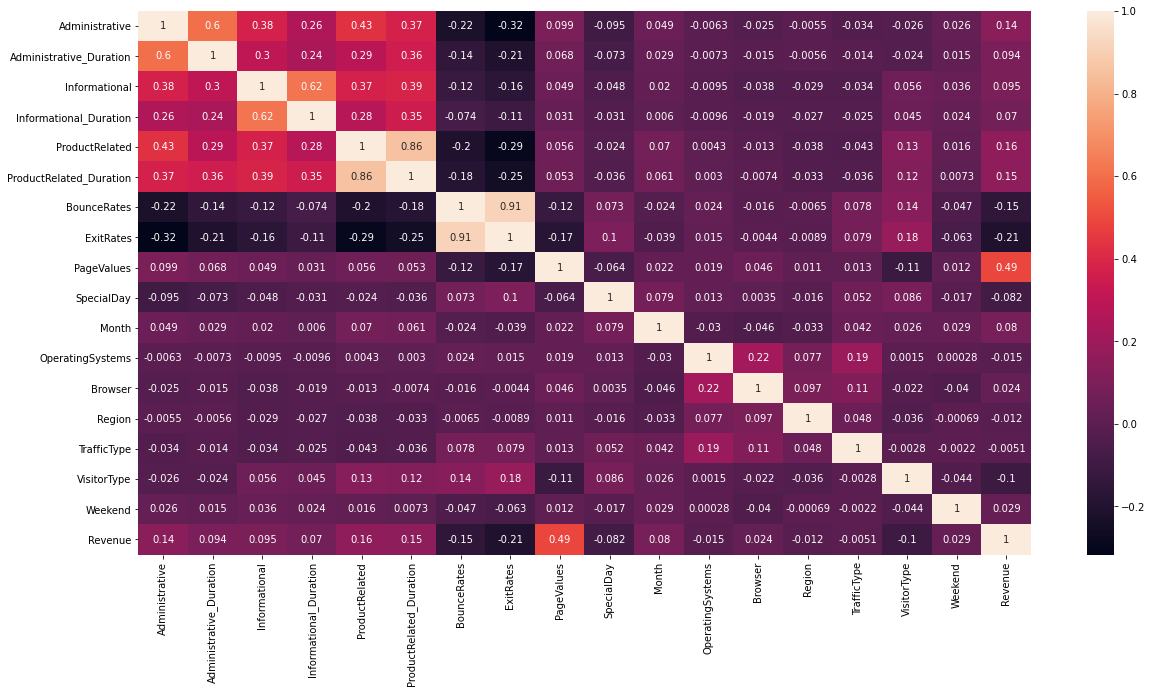

In [9]:
corr = df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot= True)
corr